In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#%tensorflow_version 1.x
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
TRAIN_DATADIR = "/content/drive/My Drive/Colab Notebooks/AI/signatures/train"
TEST_DATADIR = "/content/drive/My Drive/Colab Notebooks/AI/signatures/test"
CATEGORIES = ["tauras", "john"]

In [ ]:
training_data = []
testing_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, category)
    class_num = CATEGORIES.index(category)
    print(path)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        training_data.append([img_array, class_num])
      except Exception as e:
        pass

def create_testing_data():
  for category in CATEGORIES:
    path = os.path.join(TEST_DATADIR, category)
    class_num = CATEGORIES.index(category)
    print(path)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        testing_data.append([img_array, class_num])
      except Exception as e:
        pass

create_training_data()
create_testing_data()

/content/drive/My Drive/Colab Notebooks/AI/signatures/train/tauras
/content/drive/My Drive/Colab Notebooks/AI/signatures/train/john
/content/drive/My Drive/Colab Notebooks/AI/signatures/test/tauras
/content/drive/My Drive/Colab Notebooks/AI/signatures/test/john


In [ ]:
print(len(training_data))
print(len(testing_data))

200
20


In [ ]:
import random
random.shuffle(training_data)
random.shuffle(testing_data)

In [ ]:
IMG_WIDTH = 100
IMG_HEIGHT = 50
X = []
y = []
X_test = []
y_test = []
for features,label in training_data:
    X.append(features)
    y.append(label)

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)


#print(X[0].reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1))

X = np.array(X).reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)
X_test = np.array(X_test).reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)
y = np.array(y)
X = X/255.0
X_test = X_test/255.0
y_test = np.array(y_test)


In [ ]:
CNNmodel = Sequential()

CNNmodel.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
CNNmodel.add(Activation('relu'))
CNNmodel.add(MaxPooling2D(pool_size=(4, 4)))

CNNmodel.add(Conv2D(256, (3, 3)))
CNNmodel.add(Activation('relu'))
CNNmodel.add(MaxPooling2D(pool_size=(4, 4)))

CNNmodel.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

CNNmodel.add(Dense(64))
CNNmodel.add(Dropout(0.2)) # THIS IS TO PREVENT OVERFITTING
CNNmodel.add(Dense(1)) 
CNNmodel.add(Activation('sigmoid'))

CNNmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNNmodel.fit(X, y, batch_size=32, epochs=10)

Epoch 1/10
7/7 [==============================] - 5s 722ms/step - loss: 0.8120 - accuracy: 0.4900
Epoch 2/10
7/7 [==============================] - 5s 730ms/step - loss: 0.5223 - accuracy: 0.9250
Epoch 3/10
7/7 [==============================] - 5s 729ms/step - loss: 0.3014 - accuracy: 0.9000
Epoch 4/10
7/7 [==============================] - 6s 891ms/step - loss: 0.2093 - accuracy: 0.8950
Epoch 5/10
7/7 [==============================] - 6s 791ms/step - loss: 0.1725 - accuracy: 0.9300
Epoch 6/10
7/7 [==============================] - 5s 767ms/step - loss: 0.1513 - accuracy: 0.9400
Epoch 7/10
7/7 [==============================] - 5s 765ms/step - loss: 0.0940 - accuracy: 0.9700
Epoch 8/10
7/7 [==============================] - 5s 714ms/step - loss: 0.0727 - accuracy: 0.9800
Epoch 9/10
7/7 [==============================] - 5s 694ms/step - loss: 0.0349 - accuracy: 0.9900
Epoch 10/10
7/7 [==============================] - 5s 767ms/step - loss: 0.0304 - accuracy: 1.0000


In [ ]:
from sklearn.svm import SVC
X = np.array(X).reshape(-1, IMG_WIDTH*IMG_HEIGHT)
X_test = np.array(X_test).reshape(-1, IMG_WIDTH*IMG_HEIGHT)

SVCmodel = SVC(C=10)
SVCmodel.fit(X, y)
SVCmodel.score(X_test, y_test)

1.0

In [ ]:
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=40)
knn_clf.fit(X, y)

y_knn_pred = knn_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

1.0

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X, y, cv=3, scoring="accuracy")

array([0.95522388, 0.97014925, 1.        ])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf, X, y, cv=3)
conf_mx = confusion_matrix(y, y_train_pred)
conf_mx

array([[100,   0],
       [  5,  95]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y, y_train_pred)

1.0

In [ ]:
recall_score(y, y_train_pred)

0.95

In [ ]:
from sklearn.metrics import f1_score
f1_score(y, y_train_pred)

0.9743589743589743

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


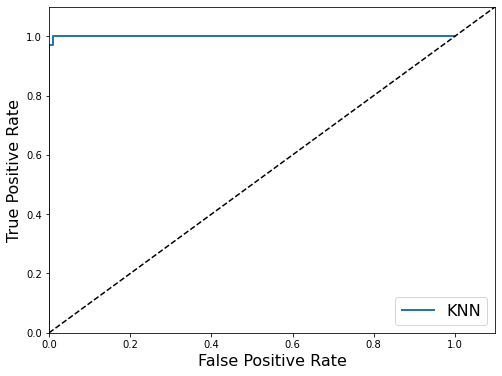

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1.1], [0, 1.1], 'k--')
    plt.axis([0, 1.1, 0, 1.1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

from sklearn.model_selection import cross_val_predict
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y, y_scores_knn, pos_label=2)

from sklearn.metrics import roc_curve
y_scores_knn = y_probas_knn[:, 1] # score = proba of positive class
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y,y_scores_knn)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plt.legend(loc="lower right", fontsize=16)
plt.show()


In [ ]:
def prepare(filepath):
  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
  return new_array.reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)

prediction = CNNmodel.predict([prepare('/content/drive/My Drive/Colab Notebooks/AI/signatures/test/tauras/1.png')])
print(CATEGORIES[int(prediction[0][0])])

prediction = CNNmodel.predict([prepare('/content/drive/My Drive/Colab Notebooks/AI/signatures/test/john/1.png')])
print(CATEGORIES[int(prediction[0][0])])

tauras
john
